In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate 1000 points for z = 2x^2 + 3y^2 + 1
n_points = 1000

# Sample x and y in a bounded range (e.g. [-1, 1])
np.random.seed(42)
x = np.random.uniform(-1, 1, n_points)
y = np.random.uniform(-1, 1, n_points)

# Compute z from the equation z = 2x^2 + 3y^2 + 1
z = 2 * x**2 + 3 * y**2 + 1

# Verify: all points should satisfy z = 2x^2 + 3y^2 + 1
z_check = 2 * x**2 + 3 * y**2 + 1
print(f"Verification - z matches formula (should be ~0 error):")
print(f"Max |z - (2x²+3y²+1)|: {np.abs(z - z_check).max():.2e}")

# Create DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

print(f"\nDataset shape: {df.shape}")
print(f"\nFirst 10 points:")
print(df.head(10))

Verification - z matches formula (should be ~0 error):
Max |z - (2x²+3y²+1)|: 0.00e+00

Dataset shape: (1000, 3)

First 10 points:
          x         y         z
0 -0.250920 -0.629734  2.315617
1  0.901429  0.083802  2.646215
2  0.463988  0.745892  3.099633
3  0.197317  0.464450  1.725009
4 -0.687963  0.613122  3.074342
5 -0.688011  0.317567  2.249264
6 -0.883833  0.384553  3.005964
7  0.732352  0.698391  3.535931
8  0.202230 -0.500664  1.833787
9  0.416145 -0.021150  1.347696


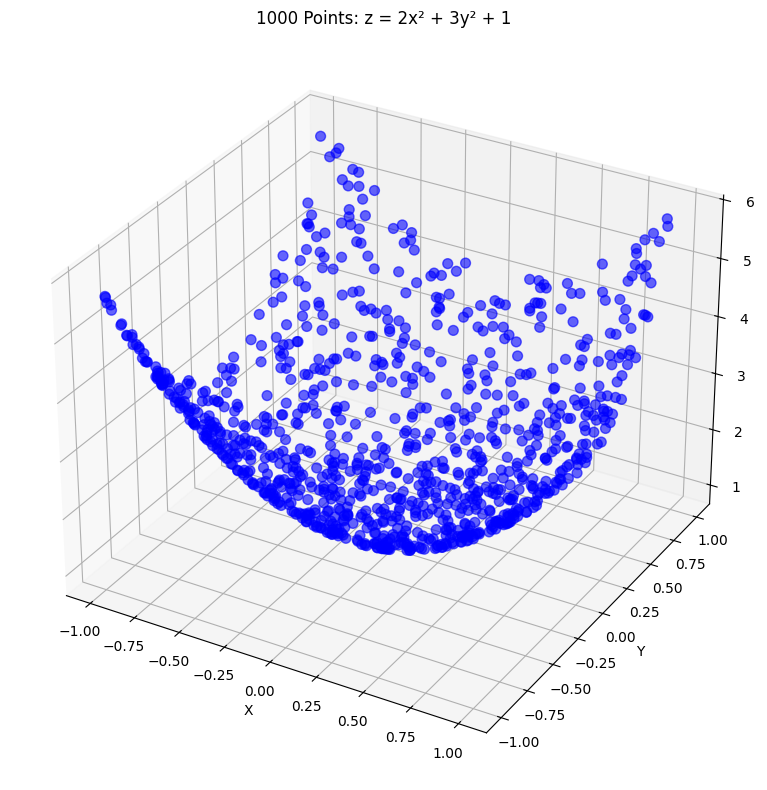

In [19]:
# Visualize the points on the surface z = 2x² + 3y² + 1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, c='blue', s=50, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('1000 Points: z = 2x² + 3y² + 1')

plt.tight_layout()
plt.show()

In [20]:
# Prepare data for neural network training
# Features: x, y
# Label: z

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Extract features (x, y) and label (z)
X = df[['x', 'y']].values
y = df['z'].values

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Feature shape: {X_train.shape[1]}")

Training set size: 800
Test set size: 200
Feature shape: 2


In [21]:
# Build neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,), name='hidden1'),
    layers.Dense(32, activation='relu', name='hidden2'),
    layers.Dense(16, activation='relu', name='hidden3'),
    layers.Dense(1, name='output')  # Single output for z
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error
    metrics=['mae']  # Mean Absolute Error
)

# Display model architecture
model.summary()

c:\Users\nhphuong\Desktop\Solar\all_data\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0312 - mae: 1.4059 - val_loss: 0.2215 - val_mae: 0.3832
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2159 - mae: 0.3921 - val_loss: 0.1303 - val_mae: 0.3086
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1249 - mae: 0.2990 - val_loss: 0.0889 - val_mae: 0.2463
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0910 - mae: 0.2480 - val_loss: 0.0730 - val_mae: 0.2232
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0730 - mae: 0.2190 - val_loss: 0.0655 - val_mae: 0.2159
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0623 - mae: 0.2016 - val_loss: 0.0522 - val_mae: 0.1873
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0561 - mae: 0.1858 - val_loss: 0.0495 - val_mae: 0.1862
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0519 - mae: 0.1799 - val_loss: 0.0494 - val_mae: 0.1870
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0501 - mae: 0.1

In [23]:
# Evaluate the model on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")

# Make predictions
y_pred = model.predict(X_test_scaled, verbose=0).flatten()

# Calculate additional metrics
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR² Score: {r2:.6f}")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {np.sqrt(mse):.6f}")

Test Loss (MSE): 0.000317
Test MAE: 0.013337

R² Score: 0.999729
MSE: 0.000317
RMSE: 0.017802


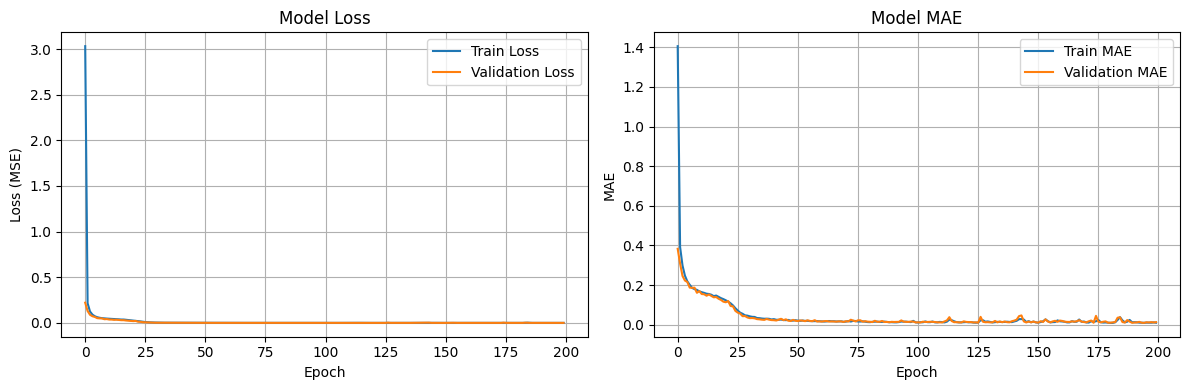

In [24]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Model Loss')
axes[0].legend()
axes[0].grid(True)

# MAE
axes[1].plot(history.history['mae'], label='Train MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('Model MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [29]:
# Partial derivatives via finite differences
# Process: pick (x,y) -> compute z -> perturb x by ε -> ∂z/∂x ≈ [z(x+ε,y)-z(x,y)]/ε, same for y

eps = 1e-5

def compute_partials_at_point(x_pt, y_pt, z_actual=None):
    """Compute NN z, finite-diff ∂z/∂x and ∂z/∂y, and analytical partials at (x_pt, y_pt)."""
    pt = np.array([[x_pt, y_pt]])
    pt_scaled = scaler.transform(pt)
    z_at_pt = model.predict(pt_scaled, verbose=0).flatten()[0]
    pt_plus_eps_x = scaler.transform(np.array([[x_pt + eps, y_pt]]))
    z_at_x_plus_eps = model.predict(pt_plus_eps_x, verbose=0).flatten()[0]
    pt_plus_eps_y = scaler.transform(np.array([[x_pt, y_pt + eps]]))
    z_at_y_plus_eps = model.predict(pt_plus_eps_y, verbose=0).flatten()[0]
    dz_dx = (z_at_x_plus_eps - z_at_pt) / eps
    dz_dy = (z_at_y_plus_eps - z_at_pt) / eps
    dz_dx_an = 4 * x_pt
    dz_dy_an = 6 * y_pt
    return z_at_pt, dz_dx, dz_dy, dz_dx_an, dz_dy_an

def print_one(i, x_pt, y_pt, z_actual, z_at_pt, dz_dx, dz_dy, dz_dx_an, dz_dy_an, from_data=True):
    z_ref = z_actual if from_data else None
    print(f"  Point {i}: x = {x_pt:.6f}, y = {y_pt:.6f}")
    if z_ref is not None:
        print(f"           z (data) = {z_ref:.6f}  |  z (model) = {z_at_pt:.6f}")
    else:
        print(f"           z (model) = {z_at_pt:.6f}")
    print(f"           ∂z/∂x: FD = {dz_dx:.6f}  |  analytical 4x = {dz_dx_an:.6f}")
    print(f"           ∂z/∂y: FD = {dz_dy:.6f}  |  analytical 6y = {dz_dy_an:.6f}")
    print()

# --- 5 points from the test set ---
print("=" * 60)
print("PARTIAL DERIVATIVES ON 5 TEST POINTS (from test set)")
print("=" * 60)
np.random.seed(123)
test_indices = np.random.choice(len(X_test), size=5, replace=False)
for k, idx in enumerate(test_indices, 1):
    x_pt, y_pt = X_test[idx, 0], X_test[idx, 1]
    z_actual = y_test[idx]
    z_at_pt, dz_dx, dz_dy, dz_dx_an, dz_dy_an = compute_partials_at_point(x_pt, y_pt)
    print_one(k, x_pt, y_pt, z_actual, z_at_pt, dz_dx, dz_dy, dz_dx_an, dz_dy_an, from_data=True)

# --- 5 completely random new points (same domain: x, y in [-1, 1]) ---
print("=" * 60)
print("PARTIAL DERIVATIVES ON 5 COMPLETELY RANDOM NEW POINTS")
print("=" * 60)
np.random.seed(456)
random_x = np.random.uniform(-1, 1, 5)
random_y = np.random.uniform(-1, 1, 5)
for k in range(5):
    x_pt, y_pt = random_x[k], random_y[k]
    z_at_pt, dz_dx, dz_dy, dz_dx_an, dz_dy_an = compute_partials_at_point(x_pt, y_pt)
    print_one(k + 1, x_pt, y_pt, None, z_at_pt, dz_dx, dz_dy, dz_dx_an, dz_dy_an, from_data=False)

PARTIAL DERIVATIVES ON 5 TEST POINTS (from test set)
  Point 1: x = 0.027979, y = 0.173217
           z (data) = 1.091578  |  z (model) = 1.100897
           ∂z/∂x: FD = 0.226498  |  analytical 4x = 0.111916
           ∂z/∂y: FD = 1.156330  |  analytical 6y = 1.039302

  Point 2: x = 0.894497, y = -0.645700
           z (data) = 3.851037  |  z (model) = 3.890601
           ∂z/∂x: FD = 3.695488  |  analytical 4x = 3.577989
           ∂z/∂y: FD = -4.100800  |  analytical 6y = -3.874203

  Point 3: x = 0.266802, y = 0.975571
           z (data) = 3.997583  |  z (model) = 3.986783
           ∂z/∂x: FD = 0.905991  |  analytical 4x = 1.067207
           ∂z/∂y: FD = 5.936623  |  analytical 6y = 5.853426

  Point 4: x = 0.429192, y = -0.680911
           z (data) = 2.759329  |  z (model) = 2.788270
           ∂z/∂x: FD = 1.859665  |  analytical 4x = 1.716767
           ∂z/∂y: FD = -4.196167  |  analytical 6y = -4.085464

  Point 5: x = -0.499514, y = -0.879296
           z (data) = 3.818512  |

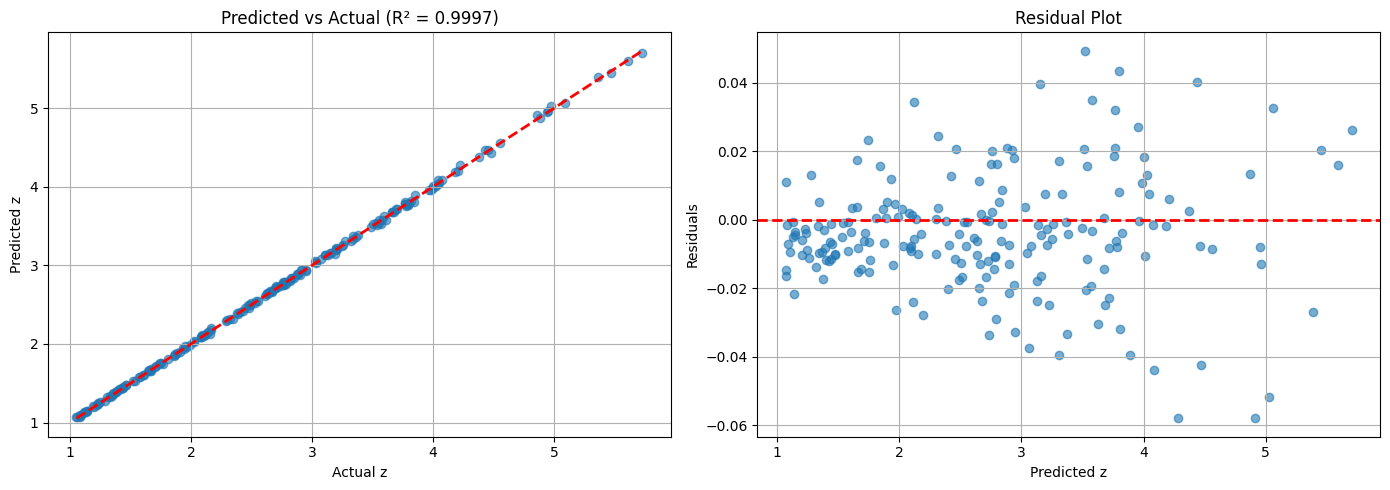

In [25]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Predicted vs Actual
axes[0].scatter(y_test, y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual z')
axes[0].set_ylabel('Predicted z')
axes[0].set_title(f'Predicted vs Actual (R² = {r2:.4f})')
axes[0].grid(True)

# Residual plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted z')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.show()

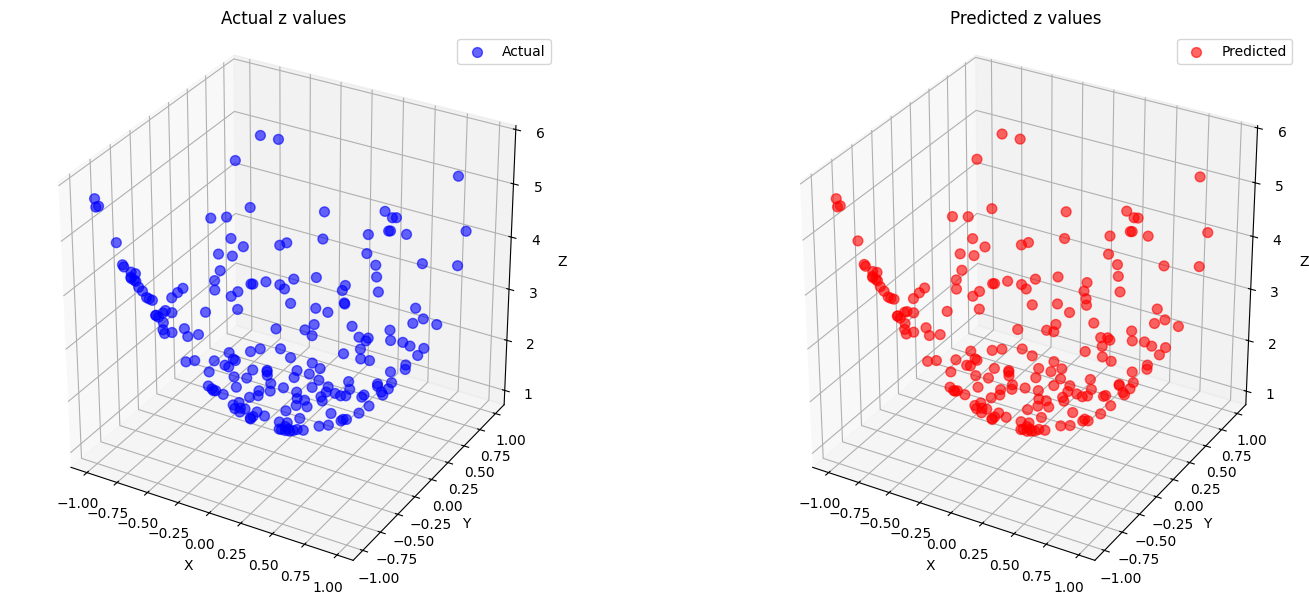

In [26]:
# 3D visualization: Compare actual vs predicted points
fig = plt.figure(figsize=(16, 6))

# Actual points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', label='Actual', alpha=0.6, s=50)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Actual z values')
ax1.legend()
ax1.set_box_aspect([1,1,1])

# Predicted points
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Predicted', alpha=0.6, s=50)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Predicted z values')
ax2.legend()
ax2.set_box_aspect([1,1,1])

plt.tight_layout()
plt.show()